In [4]:
# 인구 데이터 읽어서 행별 리스트로 구성 1
with open('data-files/population.csv', 'rt', encoding='utf-8') as f:
    lines = f.readlines()

print(lines[1])
# lines[1].split('","')

row = lines[1].replace(',', '').split('""')
# for line in row[1:]:
#     print( int(line.replace('"\n', "")) )

# [ int(line.replace('"\n', "")) for line in row[1:] ]

# [1, 2, 3] + [4, 5, 6] -> [1, 2, 3, 4, 5, 6]
[row[0].replace('"', '')] + [ int(line.replace('"\n', "")) for line in row[1:] ]

"서울특별시  (1100000000)","9,330,658","9,330,658","39,850","37,364","40,099","42,172","42,945","46,754","50,060","54,418","61,329","66,453","66,543","66,127","74,635","71,242","73,447","69,054","73,018","78,621","72,846","74,667","86,461","92,826","96,541","113,173","137,273","139,995","148,585","159,020","161,576","167,364","167,804","164,404","164,326","158,427","142,047","135,003","131,689","127,092","125,290","126,249","125,606","138,018","146,383","149,586","146,917","147,004","127,047","134,132","132,614","135,257","146,706","151,760","155,520","162,241","159,423","154,190","151,509","140,663","130,467","135,260","135,832","126,882","138,325","141,359","148,378","138,841","128,976","127,758","116,975","121,574","106,957","90,873","97,966","69,860","75,167","76,342","73,907","75,208","62,756","50,708","51,286","48,329","55,495","45,253","35,501","33,125","27,995","23,560","19,915","16,688","12,989","9,878","7,802","5,641","4,343","3,550","2,569","1,813","1,068","639","1,483","4,504,43

['서울특별시  (1100000000)',
 9330658,
 9330658,
 39850,
 37364,
 40099,
 42172,
 42945,
 46754,
 50060,
 54418,
 61329,
 66453,
 66543,
 66127,
 74635,
 71242,
 73447,
 69054,
 73018,
 78621,
 72846,
 74667,
 86461,
 92826,
 96541,
 113173,
 137273,
 139995,
 148585,
 159020,
 161576,
 167364,
 167804,
 164404,
 164326,
 158427,
 142047,
 135003,
 131689,
 127092,
 125290,
 126249,
 125606,
 138018,
 146383,
 149586,
 146917,
 147004,
 127047,
 134132,
 132614,
 135257,
 146706,
 151760,
 155520,
 162241,
 159423,
 154190,
 151509,
 140663,
 130467,
 135260,
 135832,
 126882,
 138325,
 141359,
 148378,
 138841,
 128976,
 127758,
 116975,
 121574,
 106957,
 90873,
 97966,
 69860,
 75167,
 76342,
 73907,
 75208,
 62756,
 50708,
 51286,
 48329,
 55495,
 45253,
 35501,
 33125,
 27995,
 23560,
 19915,
 16688,
 12989,
 9878,
 7802,
 5641,
 4343,
 3550,
 2569,
 1813,
 1068,
 639,
 1483,
 4504432,
 4504432,
 20319,
 19207,
 20480,
 21595,
 22070,
 24391,
 25854,
 27806,
 31333,
 33893,
 33931,
 34

In [36]:
with open('data-files/population.csv', 'rt', encoding='utf-8') as f:
    lines = f.readlines()

rows = []
for line in lines[1:]:
    row = line.replace(',', '').split('""')
    row2 = [row[0].replace('"', '')] + [ int(v.replace('"\n', "")) for v in row[1:] ]
    rows.append(row2)


In [6]:
rows[:5]

[['서울특별시  (1100000000)',
  9330658,
  9330658,
  39850,
  37364,
  40099,
  42172,
  42945,
  46754,
  50060,
  54418,
  61329,
  66453,
  66543,
  66127,
  74635,
  71242,
  73447,
  69054,
  73018,
  78621,
  72846,
  74667,
  86461,
  92826,
  96541,
  113173,
  137273,
  139995,
  148585,
  159020,
  161576,
  167364,
  167804,
  164404,
  164326,
  158427,
  142047,
  135003,
  131689,
  127092,
  125290,
  126249,
  125606,
  138018,
  146383,
  149586,
  146917,
  147004,
  127047,
  134132,
  132614,
  135257,
  146706,
  151760,
  155520,
  162241,
  159423,
  154190,
  151509,
  140663,
  130467,
  135260,
  135832,
  126882,
  138325,
  141359,
  148378,
  138841,
  128976,
  127758,
  116975,
  121574,
  106957,
  90873,
  97966,
  69860,
  75167,
  76342,
  73907,
  75208,
  62756,
  50708,
  51286,
  48329,
  55495,
  45253,
  35501,
  33125,
  27995,
  23560,
  19915,
  16688,
  12989,
  9878,
  7802,
  5641,
  4343,
  3550,
  2569,
  1813,
  1068,
  639,
  1483,
  45044

In [7]:
# 읍면동 수준에서 인구가 가장 많은 행정구역, 인구가 가장 적은 행정구역 검색
# --> 행정구역 - 각 행의 [0]번째 데이터에서 [-6]번째 위치의 값이 0이 아닌 행 중에서 검색 
# --> 행정구역이름 (xxxxx?xxxx) 에서 ?위치가 0이 아닌 행 중에서 검색


high_row = None
for row in rows:
    if row[0][-6] != '0': # 읍면동이라면
        # if high_row == None or high_row[1] < row[1]:
        if not high_row or high_row[1] < row[1]:
            high_row = row

print(high_row)

low_row = None
for row in rows:
    if row[0][-6] != '0': # 읍면동이라면
        # if high_row == None or high_row[1] < row[1]:
        if not low_row or (row[1] > 0 and low_row[1] > row[1]):
            low_row = row

print(low_row)




['경상남도 양산시 물금읍(4833025300)', 116849, 116849, 687, 714, 798, 872, 1003, 1164, 1340, 1470, 1626, 1760, 1684, 1605, 1707, 1670, 1502, 1388, 1390, 1467, 1173, 1062, 1026, 1006, 907, 990, 1171, 1191, 1184, 1191, 1434, 1400, 1407, 1528, 1651, 1689, 1617, 1647, 1640, 1809, 1766, 1874, 2045, 2341, 2575, 2595, 2580, 2493, 2144, 2239, 1909, 1946, 2046, 1957, 1932, 1897, 1889, 1853, 1778, 1674, 1468, 1592, 1427, 1306, 1523, 1486, 1563, 1346, 1231, 1246, 1039, 1087, 868, 763, 830, 575, 534, 578, 561, 461, 411, 246, 339, 320, 347, 270, 221, 204, 189, 144, 132, 112, 85, 54, 51, 41, 30, 23, 12, 8, 6, 4, 13, 57781, 57781, 382, 363, 406, 450, 515, 610, 682, 767, 868, 873, 872, 800, 868, 841, 759, 715, 698, 761, 594, 500, 558, 521, 474, 540, 568, 595, 593, 595, 707, 707, 695, 763, 791, 815, 826, 798, 823, 861, 903, 920, 1021, 1174, 1293, 1296, 1271, 1244, 1078, 1114, 952, 998, 1036, 984, 995, 929, 901, 893, 838, 777, 744, 776, 696, 651, 741, 695, 785, 623, 602, 598, 507, 516, 435, 369, 404, 271, 264, 27

In [8]:
# 남성인구비가 가장 큰 행정동, 여성인구비가 가장 많은 행정동
# 남성인구/전체인구, 여성인구/전체인구
# 전체인구수 : 각 행의 2번째 데이터, 남성총인구 : ?, 여성총인구 : ?

rows[0][100:110] # 104 : 남성총인구
rows[0][200:210] # 207 : 여성총인구

high_ratio = 0
high_row = None
for row in rows:
    if row[1] and row[0][-6] != '0': # 읍면동이라면
        ratio = row[104] / row[1]
        if high_ratio < ratio:
            high_ratio = ratio
            high_row = row

print(high_row[0], high_ratio)

경기도 파주시 월롱면(4148031000) 0.6538601823708207


In [9]:
for row in rows:
    if '영등포동' in row[0]:
        print(row)

['서울특별시 영등포구 영등포동(1156053500)', 31181, 31181, 107, 93, 121, 108, 101, 108, 81, 84, 85, 101, 89, 70, 75, 89, 73, 66, 74, 80, 93, 106, 141, 196, 261, 411, 646, 854, 1119, 1328, 1473, 1470, 1397, 1382, 1276, 1133, 850, 818, 681, 628, 575, 517, 467, 400, 410, 415, 393, 376, 291, 276, 302, 296, 317, 332, 348, 353, 329, 355, 349, 313, 332, 305, 316, 262, 318, 327, 306, 299, 293, 305, 263, 252, 232, 199, 212, 144, 128, 145, 129, 137, 109, 98, 98, 103, 90, 84, 62, 56, 53, 44, 34, 38, 32, 23, 14, 14, 12, 7, 8, 8, 1, 3, 4, 15814, 15814, 56, 49, 54, 58, 50, 52, 32, 40, 37, 47, 46, 38, 44, 43, 34, 40, 38, 46, 50, 46, 59, 78, 98, 128, 171, 267, 392, 527, 619, 700, 704, 716, 669, 578, 467, 458, 367, 339, 312, 297, 257, 232, 222, 226, 227, 212, 151, 155, 177, 158, 186, 181, 210, 212, 207, 220, 219, 186, 207, 188, 206, 161, 200, 193, 188, 188, 176, 186, 151, 134, 129, 108, 131, 90, 65, 79, 59, 57, 45, 55, 38, 52, 42, 38, 26, 27, 23, 15, 16, 14, 10, 7, 6, 5, 1, 2, 5, 4, 1, 1, 1, 15367, 15367, 51, 44, 6

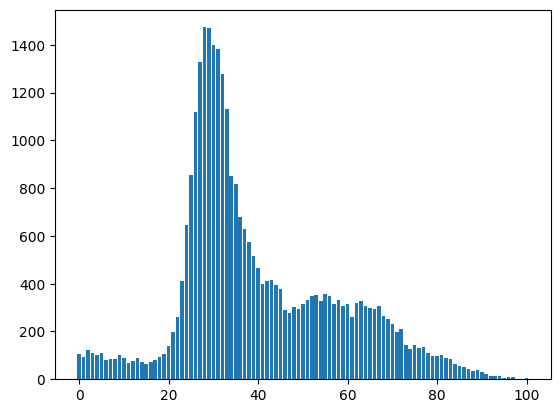

In [12]:
# 영등포동의 연령대별 인구분포 시각화 -> bar plot 사용
import matplotlib.pyplot as plt

for row in rows:
    if '영등포동' in row[0]:
        plt.bar(range( len(row[3:104]) ), row[3:104])
        break

In [ ]:
rows[3][106:207]
rows[3][209:310]

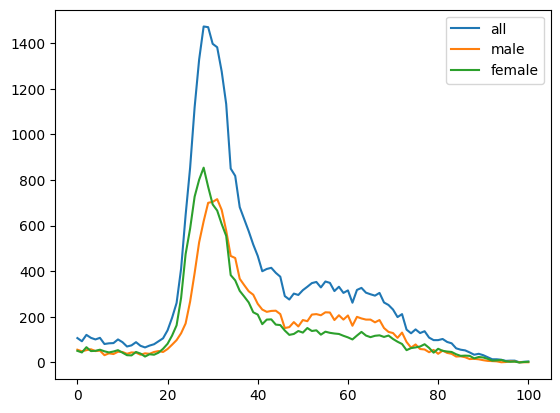

In [27]:
for row in rows:
    if '영등포동' in row[0]:
        plt.plot(range( len(row[3:104]) ), row[3:104], label='all')
        plt.plot(range( len(row[106:207]) ), row[106:207], label='male')
        plt.plot(range( len(row[209:310]) ), row[209:310], label='female')
        plt.legend()
        break

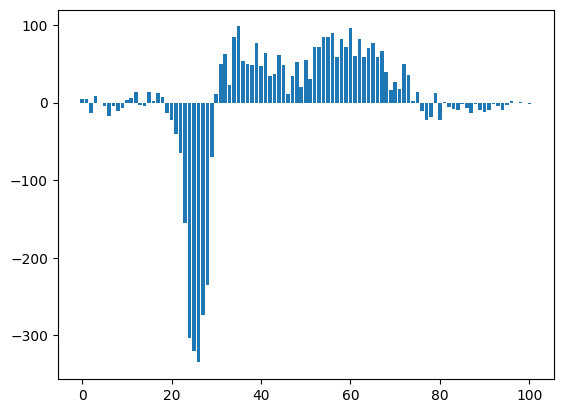

In [ ]:
for row in rows:
    if '영등포동' in row[0]:
        # 방법 1
        # data = []
        # for i in range(101):
        #     data.append(row[106+i] - row[209+i] ) # 각 연령의 남성인구 - 여성인구

        # 방법 2
        # data = []
        # for m, f in zip(row[106:207], row[209:310]):
        #     data.append(m-f) # 각 연령의 남성인구 - 여성인구

        # 방법 3
        data = [m-f for m, f in zip(row[106:207], row[209:310])]

        plt.bar(range(101), data)
        break

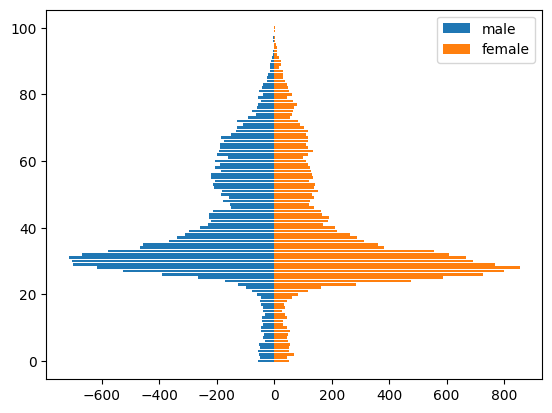

In [32]:
for row in rows:
    if '영등포동' in row[0]:
        for i, v in enumerate(row[106:207]):
            row[106+i] = -v
        plt.barh(range( 101 ), row[106:207], label='male')
        plt.barh(range( 101 ), row[209:310], label='female')
        plt.legend()
        break